In [1]:
import sys, os

import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sn

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
try:
    data = pd.read_csv('../dataset/clean_bo3.csv', encoding='utf-8-sig', converters={'pre_routes':eval}, index_col=0)
except:
    sys.path.append(os.path.realpath('../'))
    data = pd.read_csv('../dataset/clean_bo3.csv', encoding='utf-8-sig', converters={'pre_routes':eval}, index_col=0)


data.reset_index(level=0, inplace=True)

data.head(10)

,index,vehicle_id,p_start,p_temp,p_end,pre_routes,freq,label
0,0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","(xa_lộ_hà_nội, xa_lộ_hà_nội, thảo_điền)",121,False
1,16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)","(xa_lộ_hà_nội, xa_lộ_hà_nội, cầu_sài_gòn_1)",305,False
2,21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)","(xa_lộ_hà_nội, xa_lộ_hà_nội, điện_biên_phủ)",522,False
3,40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)","(xa_lộ_hà_nội, xa_lộ_hà_nội, võ_thị_sáu)",250,False
4,50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)","(xa_lộ_hà_nội, xa_lộ_hà_nội, nam_kỳ_khởi_nghĩa)",127,False
5,59,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.681, 10.7926)","(xa_lộ_hà_nội, xa_lộ_hà_nội, nguyễn_văn_trỗi)",299,False
6,102,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.736, 10.8026)","(xa_lộ_hà_nội, thảo_điền, nguyễn_duy_hiệu)",496,False
7,106,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.734, 10.8034)","(xa_lộ_hà_nội, thảo_điền, số_39)",185,False
8,107,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.73200000000001, 10.8028)","(xa_lộ_hà_nội, thảo_điền, quốc_hương)",253,False
9,112,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.73200000000001, 10.8)","(xa_lộ_hà_nội, thảo_điền, empty)",276,False


In [3]:
data[['pre_routes', 'label']]

,pre_routes,label
0,"(xa_lộ_hà_nội, xa_lộ_hà_nội, thảo_điền)",False
1,"(xa_lộ_hà_nội, xa_lộ_hà_nội, cầu_sài_gòn_1)",False
2,"(xa_lộ_hà_nội, xa_lộ_hà_nội, điện_biên_phủ)",False
3,"(xa_lộ_hà_nội, xa_lộ_hà_nội, võ_thị_sáu)",False
4,"(xa_lộ_hà_nội, xa_lộ_hà_nội, nam_kỳ_khởi_nghĩa)",False
...,...,...
14856,"(nguyễn_kiệm, nguyễn_oanh, hẻm_309_nguyễn_oanh)",True
14857,"(pham_ngũ_lão, quang_trung, hà_huy_giáp)",True
14858,"(hẻm_35_phạm_ngũ_lão, nguyễn_oanh, hẻm_309_ngu...",True
14859,"(quang_trung, hẻm_309_nguyễn_oanh, nguyễn_oanh)",True


In [4]:
data['pre_routes'] = data['pre_routes'].apply(lambda x: list(x))
data['label'] = data['label'].apply(lambda label: -1 if label == False else 1)

print("N_normal: ",len(data[data['label']==-1]))
print("N_abnormal: ",len(data[data['label']==1]))
data['label'].describe()

N_normal:  9401
N_abnormal:  5460


count    14861.000000
mean        -0.265191
std          0.964228
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [5]:
X = data['pre_routes']
y = data['label']

In [6]:
# dataframe = pd.DataFrame(X_train_vec.A, columns=vectorizer.get_feature_names())
# dataframe

In [7]:
def clf_report(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=['Normal','Anomaly']))

    cm = confusion_matrix(y_true,y_pred, labels=[-1,1])    
    df_cm = pd.DataFrame(cm,columns = ['Normal','Anomaly'])
    df_cm = df_cm.rename(index = {0:'Normal',1:'Anomaly'})
    sn.heatmap(df_cm, annot=True, fmt="d")
    plt.show()

    return precision_recall_fscore_support(y_true,y_pred,average='macro')

In [8]:
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)


clf = LinearSVC(C=5, tol=1e-5, max_iter=2500, random_state=42)
# clf = LinearSVC(C=10, penalty='l1', loss='squared_hinge', dual=False, class_weight='balanced', max_iter=2500, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

==================================================1==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.92      0.95      0.93      7520
     Anomaly       0.91      0.85      0.88      4368

    accuracy                           0.92     11888
   macro avg       0.92      0.90      0.91     11888
weighted avg       0.92      0.92      0.92     11888



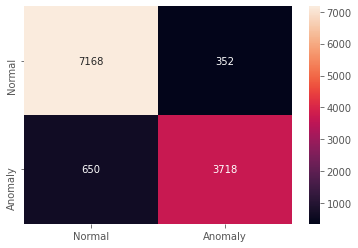

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.91      0.95      0.93      1881
     Anomaly       0.90      0.84      0.87      1092

    accuracy                           0.91      2973
   macro avg       0.91      0.90      0.90      2973
weighted avg       0.91      0.91      0.91      2973



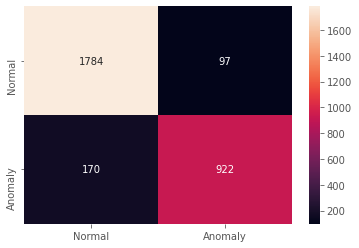


==================================================2==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.92      0.95      0.94      7521
     Anomaly       0.92      0.85      0.88      4368

    accuracy                           0.92     11889
   macro avg       0.92      0.90      0.91     11889
weighted avg       0.92      0.92      0.92     11889



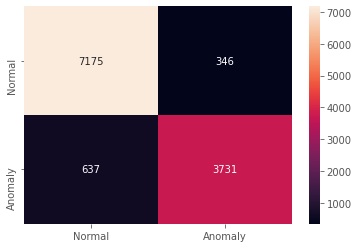

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.91      0.95      0.93      1880
     Anomaly       0.90      0.84      0.87      1092

    accuracy                           0.91      2972
   macro avg       0.91      0.89      0.90      2972
weighted avg       0.91      0.91      0.91      2972



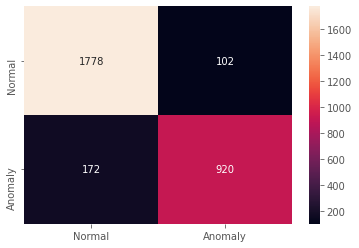


==================================================3==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.92      0.95      0.94      7521
     Anomaly       0.91      0.86      0.88      4368

    accuracy                           0.92     11889
   macro avg       0.92      0.90      0.91     11889
weighted avg       0.92      0.92      0.92     11889



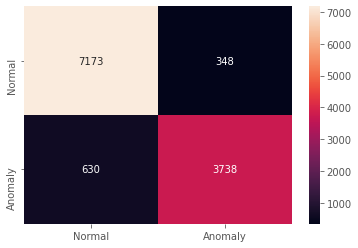

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.91      0.94      0.93      1880
     Anomaly       0.89      0.85      0.87      1092

    accuracy                           0.91      2972
   macro avg       0.90      0.89      0.90      2972
weighted avg       0.91      0.91      0.90      2972



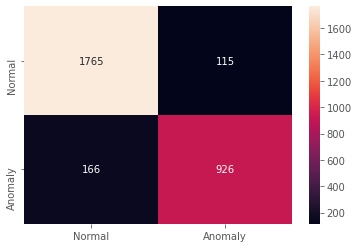


==================================================4==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.92      0.95      0.94      7521
     Anomaly       0.91      0.86      0.89      4368

    accuracy                           0.92     11889
   macro avg       0.92      0.91      0.91     11889
weighted avg       0.92      0.92      0.92     11889



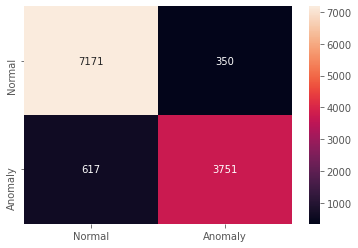

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.90      0.95      0.92      1880
     Anomaly       0.90      0.81      0.85      1092

    accuracy                           0.90      2972
   macro avg       0.90      0.88      0.89      2972
weighted avg       0.90      0.90      0.90      2972



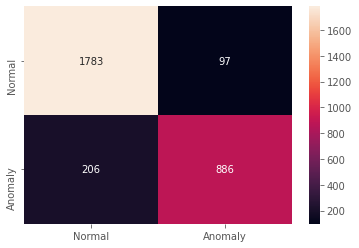


==================================================5==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.92      0.96      0.94      7521
     Anomaly       0.92      0.86      0.89      4368

    accuracy                           0.92     11889
   macro avg       0.92      0.91      0.91     11889
weighted avg       0.92      0.92      0.92     11889



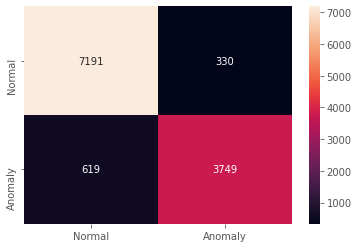

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.91      0.94      0.92      1880
     Anomaly       0.88      0.83      0.86      1092

    accuracy                           0.90      2972
   macro avg       0.89      0.88      0.89      2972
weighted avg       0.90      0.90      0.90      2972



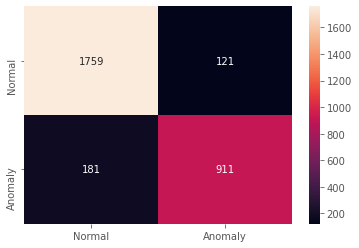

In [9]:
i = 1

precision_train = []
recall_train = []
f1_train = []
acc_train = []

precision_test = []
recall_test = []
f1_test = []
acc_test = []


for train_index, test_index in cv.split(X, y):
    
    print("="*50 + str(i) + "="*50)
    print()

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_mat = vectorizer.fit_transform(X_train)
    X_test_mat = vectorizer.transform(X_test)
    
    clf.fit(X_train_mat,y_train)
#     clf.fit(X_train_mat)
    y_train_pred = clf.predict(X_train_mat)
    y_test_pred = clf.predict(X_test_mat)


    print("Evaluation for training")
    precision,recall,fscore,support = clf_report(y_train,y_train_pred)
    precision_train.append(precision)
    recall_train.append(recall)
    f1_train.append(fscore)
    acc_train.append(accuracy_score(y_train,y_train_pred))


    print("Evaluation for testing")
    precision,recall,fscore,support = clf_report(y_test,y_test_pred)
    precision_test.append(precision)
    recall_test.append(recall)
    f1_test.append(fscore)
    acc_test.append(accuracy_score(y_test,y_test_pred))    
    
    i+=1
    print()
    
mean_precision_train = np.mean(precision_train)
mean_recall_train = np.mean(recall_train)
mean_f1_train = np.mean(f1_train)
mean_acc_train = np.mean(acc_train)

mean_precision_test = np.mean(precision_test)
mean_recall_test = np.mean(recall_test)
mean_f1_test = np.mean(f1_test)
mean_acc_test = np.mean(acc_test)

In [10]:
train_perfm = [mean_precision_train, mean_recall_train, mean_f1_train, mean_acc_train]
test_perfm = [mean_precision_test, mean_recall_test, mean_f1_test, mean_acc_test]

performance = pd.DataFrame([train_perfm, test_perfm], columns = ['precision', 'recall', 'f1-score', 'accuracy'], index=['training','test'])
performance

,precision,recall,f1-score,accuracy
training,0.917333,0.904866,0.910431,0.917923
test,0.902057,0.889745,0.895169,0.903976


In [11]:
X_train_mat = vectorizer.fit_transform(X_train[30:35])
dataframe = pd.DataFrame(X_train_mat.A, columns=[vectorizer.get_feature_names()])[:30]
# dataframe['X'] = X_train[30:35].tolist()

dataframe.index = X_train[30:35].to_numpy()
dataframe

,cầu_sài_gòn_1,cầu_vượt_ngã_tư_hàng_xanh,nam_kỳ_khởi_nghĩa,nguyễn_văn_trỗi,xa_lộ_hà_nội,đinh_tiên_hoàng,điện_biên_phủ
"[xa_lộ_hà_nội, cầu_sài_gòn_1, nam_kỳ_khởi_nghĩa]",1,0,1,0,1,0,0
"[xa_lộ_hà_nội, cầu_sài_gòn_1, nguyễn_văn_trỗi]",1,0,0,1,1,0,0
"[xa_lộ_hà_nội, điện_biên_phủ, điện_biên_phủ]",0,0,0,0,1,0,2
"[xa_lộ_hà_nội, điện_biên_phủ, cầu_vượt_ngã_tư_hàng_xanh]",0,1,0,0,1,0,1
"[xa_lộ_hà_nội, điện_biên_phủ, đinh_tiên_hoàng]",0,0,0,0,1,1,1


In [12]:
X_train_mat.shape

(5, 7)

==================================================1==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7520
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           0.99     11888
   macro avg       0.99      0.99      0.99     11888
weighted avg       0.99      0.99      0.99     11888



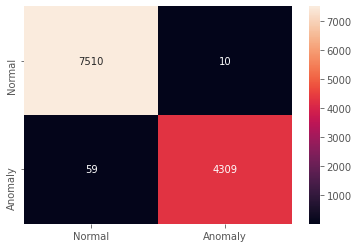

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.97      0.99      0.98      1881
     Anomaly       0.98      0.94      0.96      1092

    accuracy                           0.97      2973
   macro avg       0.97      0.96      0.97      2973
weighted avg       0.97      0.97      0.97      2973



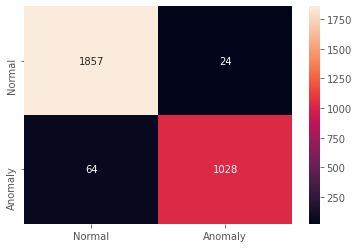


==================================================2==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7521
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           0.99     11889
   macro avg       1.00      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



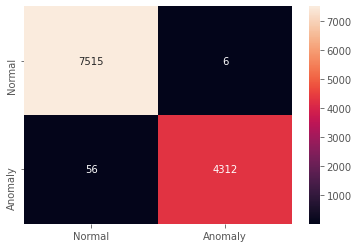

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      0.99      0.98      1880
     Anomaly       0.98      0.94      0.96      1092

    accuracy                           0.97      2972
   macro avg       0.97      0.96      0.97      2972
weighted avg       0.97      0.97      0.97      2972



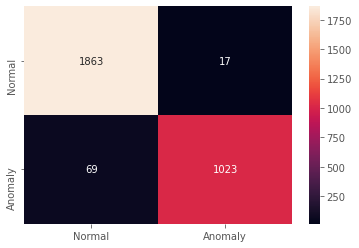


==================================================3==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7521
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           0.99     11889
   macro avg       1.00      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



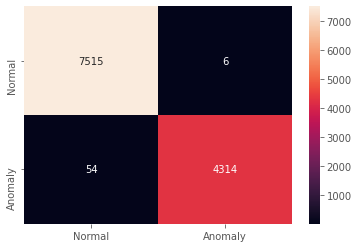

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.97      0.99      0.98      1880
     Anomaly       0.98      0.94      0.96      1092

    accuracy                           0.97      2972
   macro avg       0.97      0.96      0.97      2972
weighted avg       0.97      0.97      0.97      2972



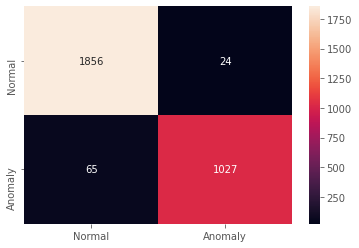


==================================================4==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7521
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           0.99     11889
   macro avg       1.00      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



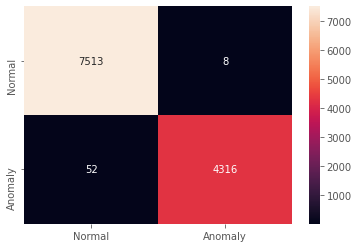

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1880
     Anomaly       0.97      0.93      0.95      1092

    accuracy                           0.96      2972
   macro avg       0.97      0.96      0.96      2972
weighted avg       0.96      0.96      0.96      2972



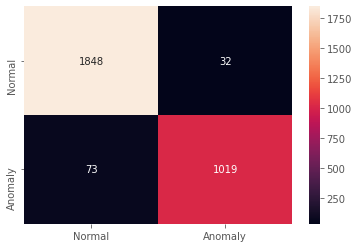


==================================================5==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7521
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           1.00     11889
   macro avg       1.00      0.99      1.00     11889
weighted avg       1.00      1.00      1.00     11889



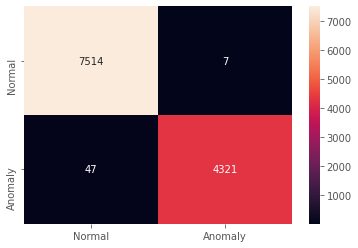

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1880
     Anomaly       0.97      0.92      0.95      1092

    accuracy                           0.96      2972
   macro avg       0.96      0.95      0.96      2972
weighted avg       0.96      0.96      0.96      2972



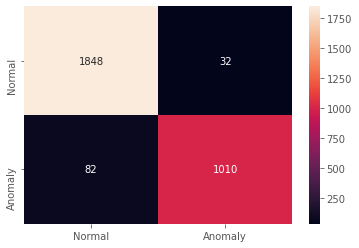

,precision,recall,f1-score,accuracy
training,0.995602,0.993372,0.994469,0.994869
test,0.969349,0.960813,0.964800,0.967566


In [13]:
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42)

i = 1

precision_train = []
recall_train = []
f1_train = []
acc_train = []

precision_test = []
recall_test = []
f1_test = []
acc_test = []


for train_index, test_index in cv.split(X, y):
    
    print("="*50 + str(i) + "="*50)
    print()

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_mat = vectorizer.fit_transform(X_train)
    X_test_mat = vectorizer.transform(X_test)
    
    clf.fit(X_train_mat,y_train)
#     clf.fit(X_train_mat)
    y_train_pred = clf.predict(X_train_mat)
    y_test_pred = clf.predict(X_test_mat)


    print("Evaluation for training")
    precision,recall,fscore,support = clf_report(y_train,y_train_pred)
    precision_train.append(precision)
    recall_train.append(recall)
    f1_train.append(fscore)
    acc_train.append(accuracy_score(y_train,y_train_pred))


    print("Evaluation for testing")
    precision,recall,fscore,support = clf_report(y_test,y_test_pred)
    precision_test.append(precision)
    recall_test.append(recall)
    f1_test.append(fscore)
    acc_test.append(accuracy_score(y_test,y_test_pred))    
    
    i+=1
    print()
    
mean_precision_train = np.mean(precision_train)
mean_recall_train = np.mean(recall_train)
mean_f1_train = np.mean(f1_train)
mean_acc_train = np.mean(acc_train)

mean_precision_test = np.mean(precision_test)
mean_recall_test = np.mean(recall_test)
mean_f1_test = np.mean(f1_test)
mean_acc_test = np.mean(acc_test)

train_perfm = [mean_precision_train, mean_recall_train, mean_f1_train, mean_acc_train]
test_perfm = [mean_precision_test, mean_recall_test, mean_f1_test, mean_acc_test]

performance = pd.DataFrame([train_perfm, test_perfm], columns = ['precision', 'recall', 'f1-score', 'accuracy'], index=['training','test'])
performance

==================================================1==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7520
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           0.99     11888
   macro avg       1.00      0.99      0.99     11888
weighted avg       0.99      0.99      0.99     11888



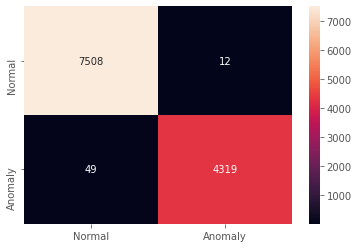

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1881
     Anomaly       0.97      0.94      0.95      1092

    accuracy                           0.97      2973
   macro avg       0.97      0.96      0.96      2973
weighted avg       0.97      0.97      0.97      2973



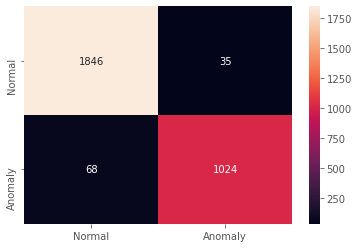


==================================================2==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7521
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           1.00     11889
   macro avg       1.00      0.99      0.99     11889
weighted avg       1.00      1.00      1.00     11889



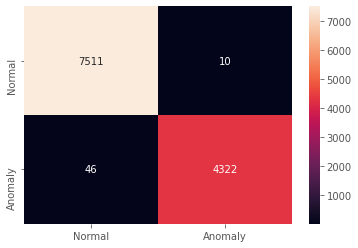

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      0.99      0.98      1880
     Anomaly       0.98      0.94      0.96      1092

    accuracy                           0.97      2972
   macro avg       0.97      0.96      0.97      2972
weighted avg       0.97      0.97      0.97      2972



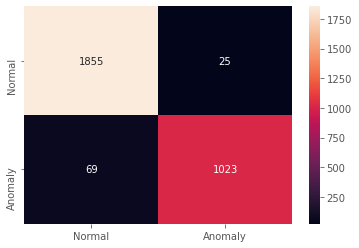


==================================================3==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7521
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           1.00     11889
   macro avg       1.00      0.99      0.99     11889
weighted avg       1.00      1.00      1.00     11889



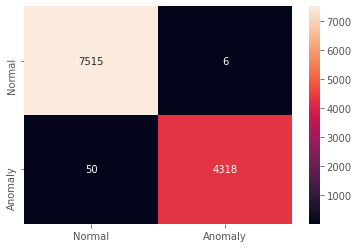

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1880
     Anomaly       0.97      0.93      0.95      1092

    accuracy                           0.97      2972
   macro avg       0.97      0.96      0.96      2972
weighted avg       0.97      0.97      0.97      2972



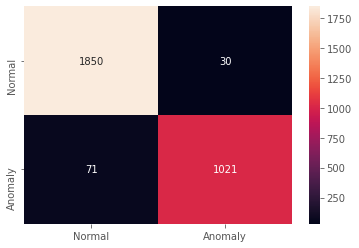


==================================================4==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7521
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           1.00     11889
   macro avg       1.00      0.99      0.99     11889
weighted avg       1.00      1.00      1.00     11889



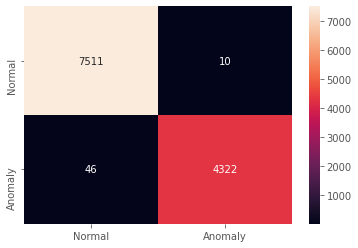

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1880
     Anomaly       0.97      0.93      0.95      1092

    accuracy                           0.96      2972
   macro avg       0.96      0.96      0.96      2972
weighted avg       0.96      0.96      0.96      2972



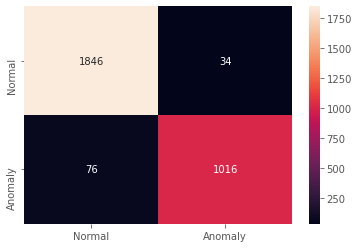


==================================================5==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      7521
     Anomaly       1.00      0.99      0.99      4368

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



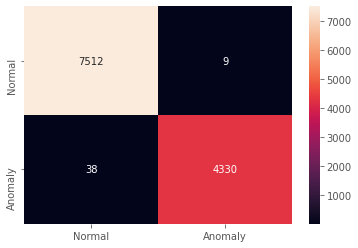

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1880
     Anomaly       0.97      0.94      0.95      1092

    accuracy                           0.97      2972
   macro avg       0.97      0.96      0.96      2972
weighted avg       0.97      0.97      0.97      2972



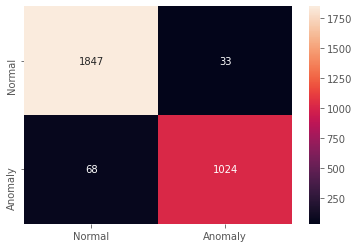

,precision,recall,f1-score,accuracy
training,0.995885,0.994132,0.994997,0.995357
test,0.966755,0.959415,0.962874,0.965749


In [14]:
clf = SVC(C=5.0, kernel='poly',tol=1e-5, max_iter=-1, random_state=42)

i = 1

precision_train = []
recall_train = []
f1_train = []
acc_train = []

precision_test = []
recall_test = []
f1_test = []
acc_test = []


for train_index, test_index in cv.split(X, y):
    
    print("="*50 + str(i) + "="*50)
    print()

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_mat = vectorizer.fit_transform(X_train)
    X_test_mat = vectorizer.transform(X_test)
    
    clf.fit(X_train_mat,y_train)
#     clf.fit(X_train_mat)
    y_train_pred = clf.predict(X_train_mat)
    y_test_pred = clf.predict(X_test_mat)


    print("Evaluation for training")
    precision,recall,fscore,support = clf_report(y_train,y_train_pred)
    precision_train.append(precision)
    recall_train.append(recall)
    f1_train.append(fscore)
    acc_train.append(accuracy_score(y_train,y_train_pred))


    print("Evaluation for testing")
    precision,recall,fscore,support = clf_report(y_test,y_test_pred)
    precision_test.append(precision)
    recall_test.append(recall)
    f1_test.append(fscore)
    acc_test.append(accuracy_score(y_test,y_test_pred))    
    
    i+=1
    print()
    
mean_precision_train = np.mean(precision_train)
mean_recall_train = np.mean(recall_train)
mean_f1_train = np.mean(f1_train)
mean_acc_train = np.mean(acc_train)

mean_precision_test = np.mean(precision_test)
mean_recall_test = np.mean(recall_test)
mean_f1_test = np.mean(f1_test)
mean_acc_test = np.mean(acc_test)

train_perfm = [mean_precision_train, mean_recall_train, mean_f1_train, mean_acc_train]
test_perfm = [mean_precision_test, mean_recall_test, mean_f1_test, mean_acc_test]

performance = pd.DataFrame([train_perfm, test_perfm], columns = ['precision', 'recall', 'f1-score', 'accuracy'], index=['training','test'])
performance